# K-Nearest Neighbour Model for Binary Classification
This notebook is the implementation of K-Nearest Neighbour for Binary Classification and this has 3 main parts
1. **Part A:** Model Code
1. **Part B:** Data Processing
1. **Part C:** Model Evaluation
A written report would also be included on the data and the KNN Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Part A

### 1. Write a function to calculate and return the Euclidean distance of two vectors.

In [2]:
"""
Calculation of Euclidean Distance with Matrix Notation
Input:
    x,y: 1D array_like types (will be converted to ndarray)
    dist: Euclidean Distance of x and y
"""
def euclidean_dist(x, y):
    x = np.array(x)
    y = np.array(y)
    diff = x - y
    dist = np.sqrt(np.dot(diff,diff))
    return dist

### 2. Write a function to calculate and return the Manhattan distance of two vectors.

In [3]:
"""
Calculation of Manhattan Distance with Matrix Notation
Input:
    x,y: 1D array_like types (will be converted to ndarray)
    dist: Manhattan Distance of x and y
"""
def manhattan_dist(x,y):
    x = np.array([x])
    y = np.array([y])
    dist=np.sum(abs(x-y))
    return dist

### 3. Write a function to calculate and return the accuracy and generalization error of two vectors. This function takes two one-dimensional arrays as input: one containing the true labels and one containing the predicted labels.

In [4]:
"""
Calculates the accuracy between the true and predicted labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    accuracy: accuracy expressed in decimal
"""
def accuracy_calc(true, pred):
    match = map(lambda x,y: x == y, list(true), list(pred))
    match = map(lambda x: 1 if x else 0, list(match))
    accuracy = np.mean(list(match))
    generalization_error=1-accuracy
    return accuracy,generalization_error

### 5. Write a function to compute the confusion matrix of two vectors. This function takes two one-dimensional arrays as input: one containing the true labels and one containing the predicted labels.


In [5]:
'''
Produces confusion matrix (assuming binary classification) given predicted
and true labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    Confusion Matrix: 2D ndarray of the following format (same as sklearn)
    array([[tn, fp],
           [fn, tp]])
'''
def confusion_matrix(true, pred):
    tp = map(lambda x,y: 1 if (x == 1 and y == 1) else 0, list(true), list(pred))
    tp = np.sum(list(tp))
    
    tn = map(lambda x,y: 1 if (x == 0 and y == 0) else 0, list(true), list(pred))
    tn = np.sum(list(tn))
    
    fp = map(lambda x,y: 1 if (x == 0 and y == 1) else 0, list(true), list(pred))
    fp = np.sum(list(fp))
    
    fn = map(lambda x,y: 1 if (x == 1 and y == 0) else 0, list(true), list(pred))
    fn = np.sum(list(fn))
    
    return np.array([[tn, fp], [fn, tp]])

### 4. Write three functions to compute: precision, recall and F1 score. These functions take two one-dimensional arrays as input: one containing the true labels and one containing the predicted labels

In [6]:
"""
Calculates the precision between the true and predicted labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    precision: accuracy expressed in decimal
"""
def precision(true,pred):
    cm=confusion_matrix(true,pred)
    prec=cm[1,1]/(cm[1,1]+cm[0,1])
    return prec
"""
Calculates the recall between the true and predicted labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    recall: accuracy expressed in decimal
"""
def recall(true,pred):
    cm=confusion_matrix(true,pred)
    rec=cm[1,1]/(cm[1,1]+cm[1,0])
    return rec
"""
Calculates the F1score between the true and predicted labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    F1score: accuracy expressed in decimal
"""
def F1_score(true,pred):
    p=precision(true,pred)
    r=recall(true,pred)
    score=2*p*r/(p+r)
    return score
    

### 6. Write a function to generate the Receiver Operating Characteristic (ROC) curve. This function takes the following 3 input: a one-dimensional array containing the true labels, a one-dimensional array containing the probability estimates of the positive class, and a one-dimensional array containing a set of threshold values between 0 and 1. It should return the True Positive Rate (TPR) and False Positive Rate (FPR) as two one-dimensional arrays, as well as draw the ROC curve by using TPR, FPR, and the threshold values.

In [7]:
'''
Takes true label, probability of positive class and threshold and produce the ROC
Curve and returns the true positive rates and false positive rates associated 
with the threshold

Input:
    true: 1D array_like vector of true labels with values 0 or 1
    probability: 1D array_like vector of probability of having positive label in range(0,1)
    threshold: 1D array_like vector in range(0,1)
Output:
    true_positive_rates, false_positive_rates: tpr and fpr rates corresponding to threshold
    ROC Curve Plot
'''
def roc_curve(true, probability, threshold):
    true_positive_rates = []
    false_positive_rates = []
    
    for t in threshold:
        # Generate predicted labels given threshold
        pred = list(map(lambda x: 1 if x >= t else 0, list(probability)))
        
        # Calculate confusion matrix
        tn,fp,fn,tp = confusion_matrix(true, pred).ravel()
        
        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        
        true_positive_rates.append(tpr)
        false_positive_rates.append(fpr)

    # Plot ROC Curve
    _ = plt.plot(false_positive_rates,true_positive_rates)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.title('Receiver Operating Characteristic Curve')
    
    plt.show()
        
    return true_positive_rates, false_positive_rates

### 7. Write a function to compute area under curve (AUC) for the ROC curve. This function takes the following 2 input: a one-dimensional array containing the true labels and a one-dimensional array containing the probability estimates of the positive class. For integration along the given axis required to compute the AUC score, you may use the numpy.trapz() function.


In [8]:
'''
Given true labels and probability of positive labels, returns the area under the curve of the ROC
Input:
    true: 1D array_like vector of true labels with values 0 or 1
    probability: 1D array_like vector of probability of having positive label in range(0,1)
Output:
    Area Under the Curve, range(0,1)
'''
def area_under_curve(true, probability):
    # Generate threshold in [0,1] with increments of 0.01
    threshold = [x/100 for x in range(0,101)]
    
    # Obtain the tpr and fpr calling the roc_curve function
    tpr, fpr = roc_curve(true, probability, threshold)
    
    auc = abs(np.trapz(tpr,fpr))
    
    return auc

### 8 Write a function to generate the precision-recall curve.This function takes the following 3 input:  a one-dimensional array containing the true labels, a one-dimensional array containing the predicted labels, and a one-dimensional array containing a set of threshold values between 0 and 1.

In [9]:
'''
Takes true label, probability of positive class and threshold and produce the Precision-Recall curve

Input:
    true: 1D array_like vector of true labels with values 0 or 1
    probability: 1D array_like vector of probability of having positive label in range(0,1)
    threshold: 1D array_like vector in range(0,1)
Output:
    Precision-Recall Curve Plot
'''
def precision_recall_curve(true,probability,threshold):
    precision_values=[]
    recall_values=[]
    for th in range(len(threshold)):
        #generate the prediction vector for every threshold value
        pred=[]
        for i in range(len(probability)):
            if probability[i]>= threshold[th]:
                pred.append(1)
            else:
                pred.append(0)    
        p=precision(true,pred)
        r=recall(true,pred)
        precision_values.append(p)
        recall_values.append(r) 
#generate the precision-recall plot
    plt.figure()
    plt.plot(recall_values,precision_values)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.title('Precision-Recall Curve')

### 9. Implement a KNN_Classifier model class. It should have the following four methods.

In [10]:
class KNN_Classifier:
    # For numerical stability
    epsilon = 0.00000001
    # A function that returns a list of labels based on the index given
    index_to_label = lambda index,label: label[index]
    # Uniform weights function
    uniform_weights = lambda x: np.array([1-(sum(x)/len(x)),sum(x)/len(x)])

    
    def __init__(self):
        pass
    
    def fit(self, X, y, n_neighbors, weights='uniform', **kwargs):
        self.X = X
        self.y = y
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance = kwargs['distance']
        
        if weights == 'uniform':
            self.weights_function = KNN_Classifier.uniform_weights
        elif weights == 'distance':
            self.weights_function = 'distance'
            
        if kwargs['distance'] == "Euclidean":
            self.distance_function = euclidean_dist
        elif kwargs['distance'] == "Manhattan":
            self.distance_function = manhattan_dist
        
    def predict(self,X):
        # Calculates Probability
        pred = self.predict_proba(X)
        
        # Assign 1 for p(x) > 0.5, else 0
        pred = np.array(list(map(lambda x: 1 if x[1] > x[0] else 0, pred)))
        
        return pred
        
    def predict_proba(self, X):
       
            # Calculate the distance for each X to self.X
            distances = []
            for j in X:
                distances.append([self.distance_function(j,i) for i in self.X])
            distances = np.array(distances)
            
            if self.weights_function == 'distance':
                
                # Based on distance calculation, get inverse for each item
                inv_dist = []
                for distance in distances:
                    inv_dist.append(np.array(list(map(lambda x: 1/KNN_Classifier.epsilon if x == 0 else 1/x, distance))))
                    
                inv_dist = np.array(inv_dist)
                
                # Sort the inverse distance based on index
                indices_dist = np.array(list((map(np.argsort,inv_dist)))) 
            
                # Get the labels of the n nearest neighbors
                labels = []
                for i in indices_dist:
                    labels.append(KNN_Classifier.index_to_label(i,self.y)[-self.n_neighbors:])
                labels = np.array(labels)
                
                # Get the inverse distance of the n nearest neighbors
                inv_dist_indices = np.array(list(map(KNN_Classifier.index_to_label,indices_dist,inv_dist)))
                inv_dist_indices = np.array(list(map(lambda x:x[-self.n_neighbors:], inv_dist_indices)))
                
                # Calculate prediction
                pred = list(map(lambda inv_weight,label: np.sum(inv_weight*label)/np.sum(inv_weight), inv_dist_indices, labels))
                
                pred = np.array(list(map(lambda x: np.array([1-x,x]), pred)))                    
                
            else:
                # Sort based on index
                indices_dist = np.array(list((map(np.argsort,distances)))) 
            
                indices = []
                for i in indices_dist:
                    indices.append(KNN_Classifier.index_to_label(i,self.y)[0:self.n_neighbors])
                    
                pred = np.array(list(map(self.weights_function, indices)))
            
            return pred
             

## Part B

### 10. Read in the winequality-white.csvfile as a Pandas data frameobject. 

In [11]:
df = pd.read_csv("./Data/winequality-white.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
#Check if there are any null values in any column
df.isna().values.any()

False

### 11. The target will be the “quality”column which represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [14]:
target=df['quality']
df['quality']=list(map(lambda x: 1 if x > 5 else 0, list(target)))

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


### 13. Shuffle the rows of your data. You may use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names.

In [17]:
df = df.sample(frac = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4680,6.8,0.63,0.04,1.3,0.058,25.0,133.0,0.99271,3.17,0.39,10.2,0
1907,7.9,0.37,0.30,2.7,0.029,64.0,158.0,0.99160,3.12,0.59,12.0,1
1419,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,1
490,7.0,0.28,0.36,1.0,0.035,8.0,70.0,0.98990,3.09,0.46,12.1,1
645,6.3,0.26,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,0


### 14. Generate pair plots using the seaborn package (see the recitation notebook on Exploratory Data Analysis). This will be used to identify and report the redundant features, if there is any.

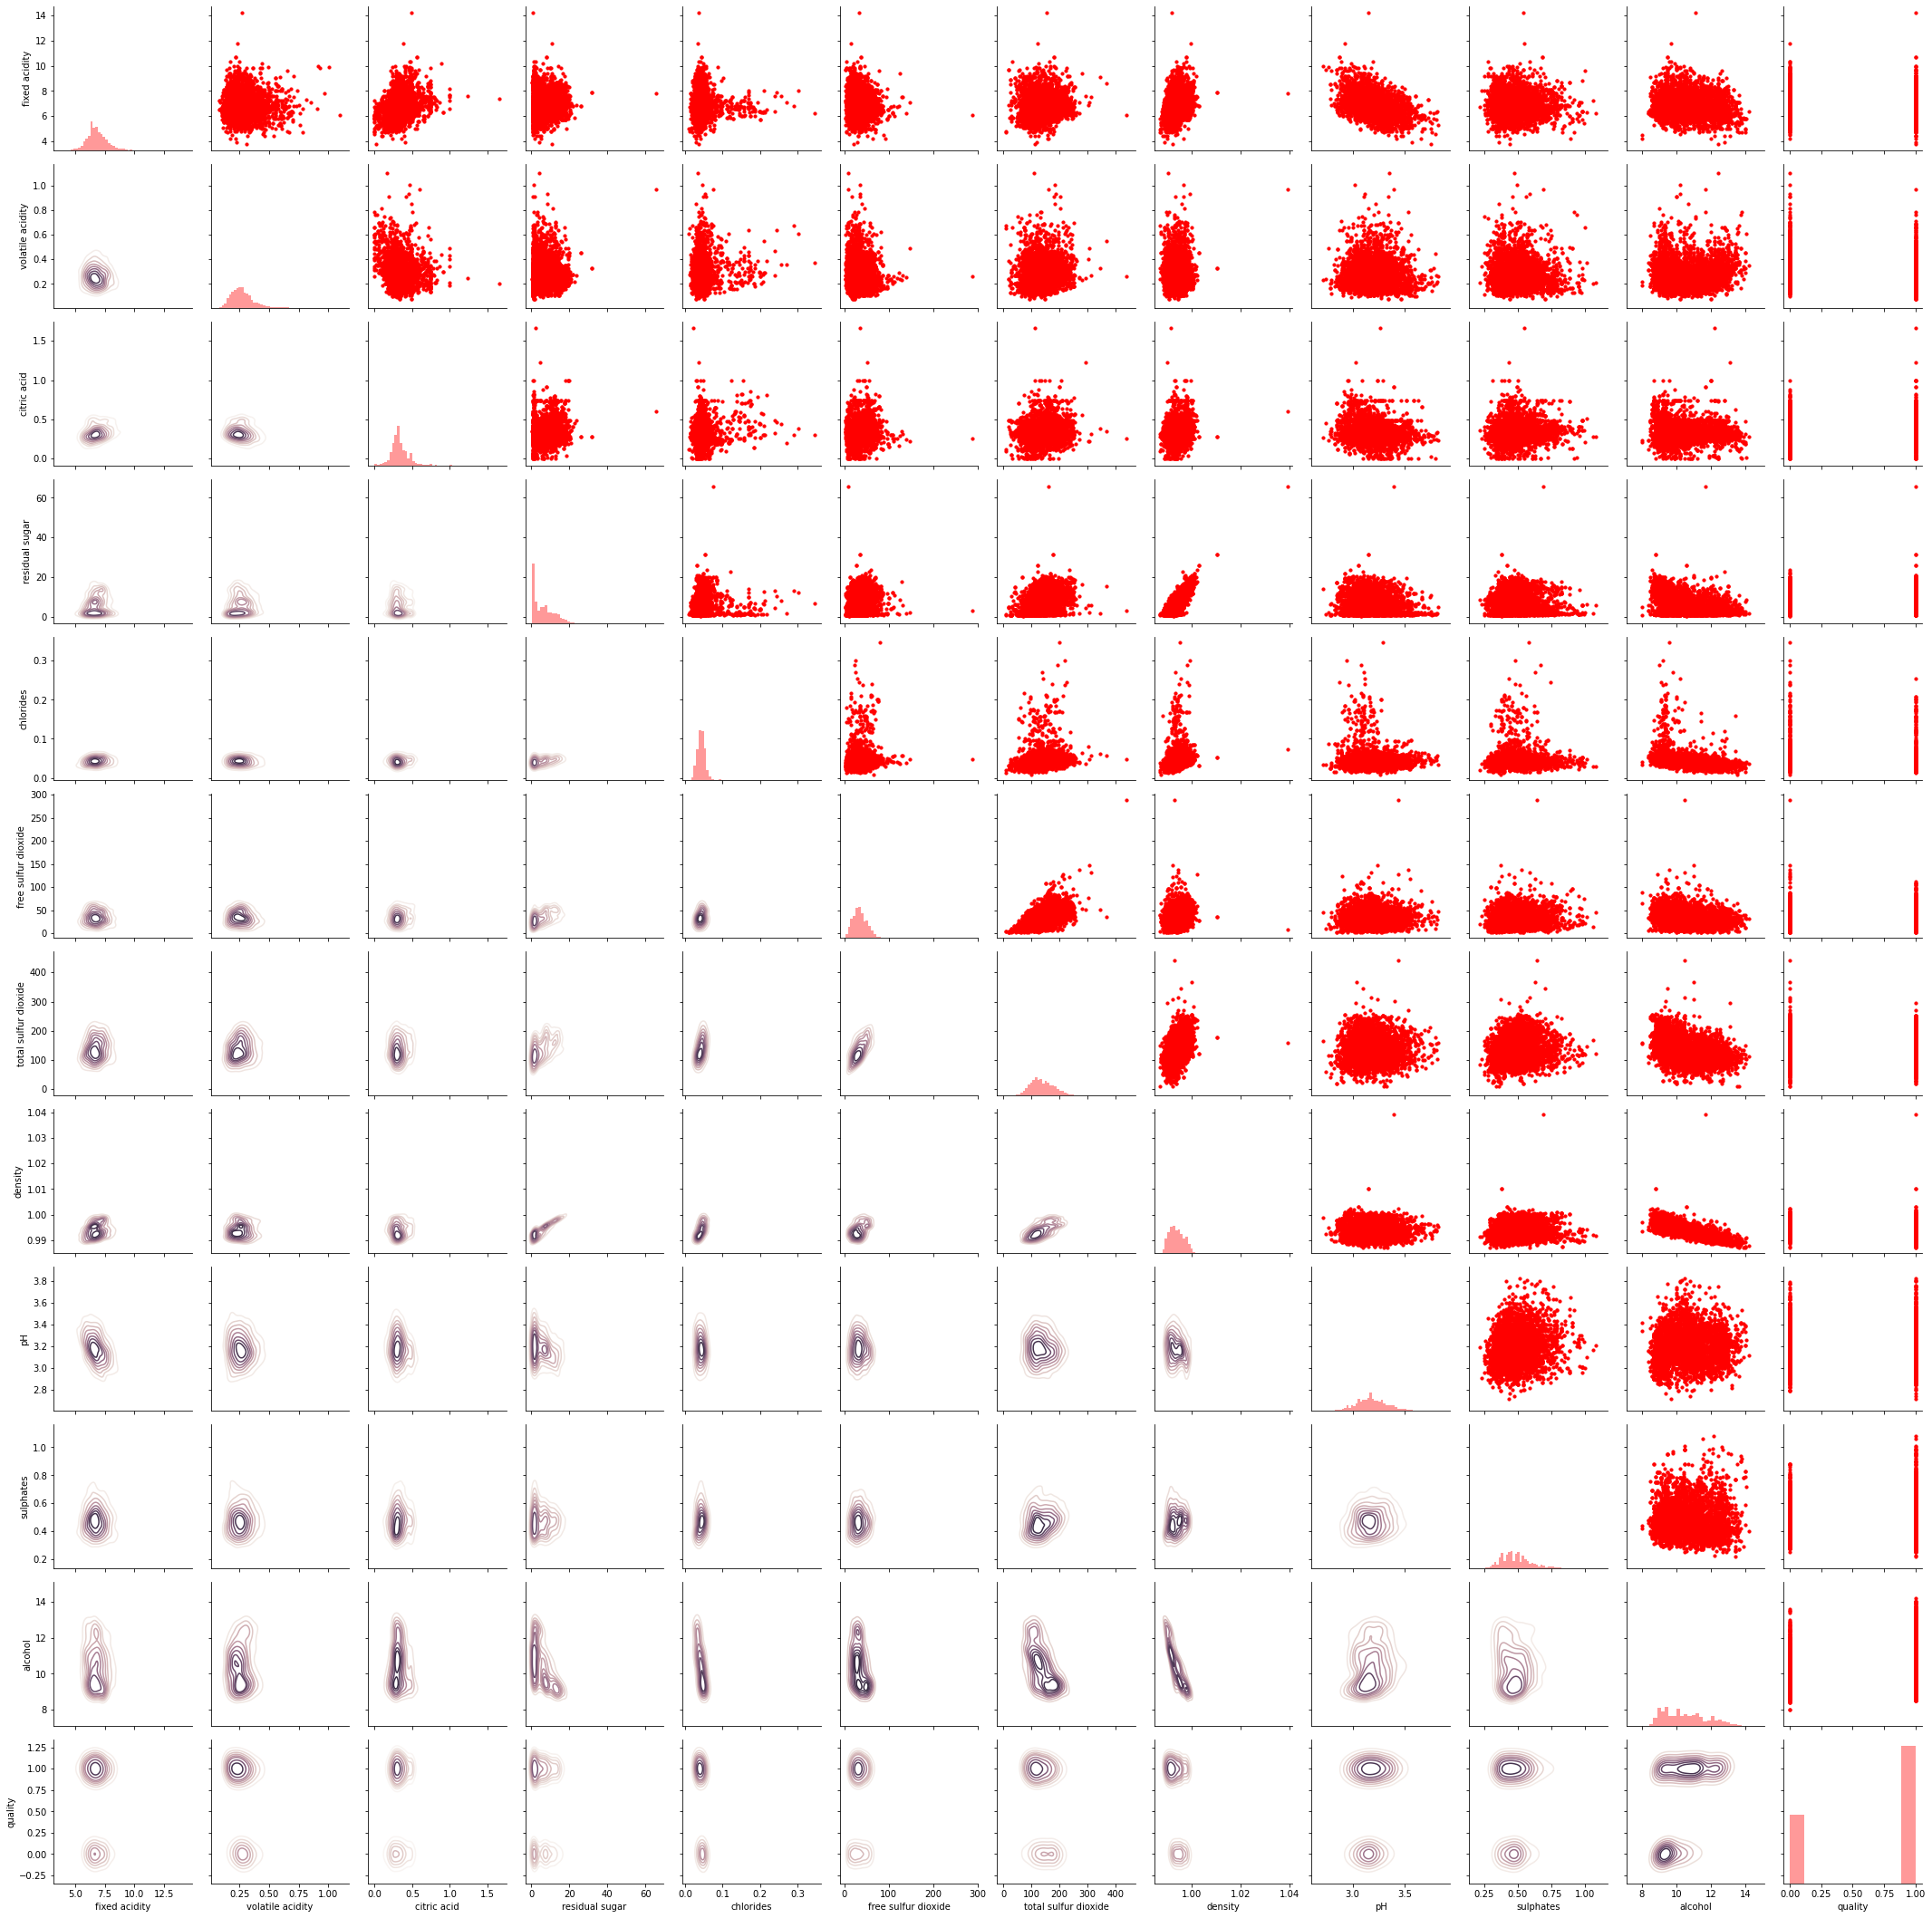

In [18]:
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


### 15. Drop the redundant features.

In [19]:
# Find correlations with the Quality
# Note that we have considered the absolute values of the correlations
# This will help to identify the most correlated features 
most_corr = df.corr().abs()
print(most_corr)


# Based on the plots and correlation results, density was spotted as a redundant feature
df = df.drop(columns = 'density')

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.022697     0.289181   
volatile acidity           0.022697          1.000000     0.149472   
citric acid                0.289181          0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide        0.049396          0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                         0.425858          0.031915     0.163748   
sulphates                  0.017143          0.035728     0.062331   
alcohol                    0.120881          0.067718     0.075729   
quality                    0.089749          0.225440     0.000700   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

### 16. Write a function named “partition” to split your data into train and test set. The function should take 3 arguments: feature matrix (numpy array with rows representing data samples and columns representing features.), target vector (numpy array with labels corresponding to each row of the feature matrix), and t. Here t is a real number to determine the size of partition. For example, if t is set to 0.2, then 80% of the data will be used for training and 20% for testing. This function should return two feature matrices for train and test data, and two one-dimensional target vectors for train and test data.


In [20]:
'''
Partitions the feature matrix and target vector into test train split, with t as the proportion of
training data
Input:
    X: feature matrix 2D array_like matrix with rows as data samples
    y: target vectors 1D array_like vector with corresponding labels of rows in X
    t: proportion for training data in range(0,1)
Output:
    X_train, X_test: feature matrix 2D array_like matrix with rows as data samples, train and test split
    y_train, y_test: target vectors 1D array_like vector with corresponding labels of rows in X, 
                     train and test split
'''
def partition(X, y, t):
    # Determine sizes of sample, training and test set
    n = len(y)
    size_train = int(t * n)
    size_test = 1 - size_train
    
    # Generate list of all index
    range_index = [x for x in range(0,n)]
    # Generate list of random index with the size of training set
    train_index = random.sample(range(0, n), size_train)
    # Obtain the set difference between all the training for test 
    test_index = list(set(range_index).difference(set(train_index)))
    
    # Subsetting train and test
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    return X_train, X_test, y_train, y_test

### 17. Naively run your KNN_Classifier model on the train dataset with n_neighbors= 5 and using Euclidean distance.

In [21]:
#Running the Model Naively
df_copy = df.copy()
X = np.array(df_copy.drop(columns = ['quality']))
y = np.array(df_copy['quality'])
X_train, X_test, y_train, y_test = partition(X,y,0.8)

# Uniform Weights
model = KNN_Classifier()
model.fit(X_train, y_train,n_neighbors=5, weights='uniform', distance="Euclidean")
pred = model.predict(X_train)

# Distance Weights
model1 = KNN_Classifier()
model1.fit(X_train, y_train,n_neighbors=5, weights='distance',distance="Euclidean")
pred1 = model1.predict(X_train)

#Scoring of Uniform Weights
acc,gen_error = accuracy_calc(y_train,pred)
print("\nAccuracy-Uniform: %0.2f" %acc)

f1 = F1_score(y_train,pred)
print("\nF1 score-Uniform: %0.2f" %f1)
#Scoring of Distance Weights
acc,gen_error=accuracy_calc(y_train,pred1)
print("\nAccuracy-Distance: %0.2f" %acc)

f1 = F1_score(y_train,pred1)
print("\nF1 score-Distance: %0.2f" %f1)


Accuracy-Uniform: 0.80

F1 score-Uniform: 0.86

Accuracy-Distance: 1.00

F1 score-Distance: 1.00


In [22]:
# Data Standardization
r,c=np.shape(X_train)
for col in range(0,c):
    m=np.mean(X_train[:,col])
    s=np.std(X_train[:,col])
    X_train[:,col]=(X_train[:,col]-m)/s
    # standardize test Data on the mean and sd of Train Data  
    X_test[:,col]=(X_test[:,col]-m)/s


In [23]:
# After Data Standardization 
# Uniform Weights
model = KNN_Classifier()
model.fit(X_train, y_train,n_neighbors=5,weights='uniform',distance="Euclidean")
pred = model.predict(X_train)
#Distance Weights
model1 = KNN_Classifier()
model1.fit(X_train, y_train,n_neighbors=5, weights='distance',distance="Euclidean")
pred1=model1.predict(X_train)

#Scoring of Uniform Weights
acc,gen_error=accuracy_calc(y_train,pred)
print("\nAccuracy-Uniform: %0.2f" %acc)

f1=F1_score(y_train,pred)
print("\nF1 score-Uniform: %0.2f" %f1)

#Scoring of Distance Weights
acc,gen_error=accuracy_calc(y_train,pred1)
print("\nAccuracy-Distance: %0.2f" %acc)

f1=F1_score(y_train,pred1)
print("\nF1 score-Distance: %0.2f" %f1)


Accuracy-Uniform: 0.84

F1 score-Uniform: 0.88

Accuracy-Distance: 1.00

F1 score-Distance: 1.00


### 18. Evaluation of an estimator performance via cross-validation: Implement the S-fold cross-validation function.

In [24]:
def sFold(estimator,X,y,scoring,cv):
    size = len(X)
    size_fold = int(size/cv)
    range_index = [j for j in range(0,len(X))]
    score=[]
    #Partitioning of the data
    for i in range(cv):
        init=0+i*size_fold
        fin=(i+1)*size_fold
        partition_range_index = [j for j in range(init,fin)]
        
        #Feature and label data of the Fold
        X_partition = X[partition_range_index]
        y_partition = y[partition_range_index]
        
        #Feature and label data of  1-Fold        
        remainder_index = list(set(range_index).difference(set(partition_range_index)))
        X_remainder=X[remainder_index]
        y_remainder=y[remainder_index]
        
        #Fit the model to the 1-Fold data
        estimator.fit(X_remainder, y_remainder, estimator.n_neighbors, estimator.weights, distance=estimator.distance) 
        
        #Test the model on the fold data
        pred=estimator.predict(X_partition)
        if scoring=='accuracy':
            acc,gen_error=accuracy_calc(y_partition,pred)
            score.append(acc)
        elif scoring=='precision':
            score.append(precision(y_partition,pred)) 
        elif scoring=='recall':
            score.append(recall(y_partition,pred))
        elif scoring=='F1score':
            score.append(F1_score(y_partition,pred)) 
            
    avg_score = np.mean(score)    
    return avg_score,score

### 19. Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets: 

In [25]:
model = KNN_Classifier()
k = [1,5,9,11]
distance = ["Euclidean", "Manhattan"]
weights = ['uniform','distance']
cv=10

results = {}

for n in k:
    for d in distance:
        for w in weights:
            label = str(n) + '_' + d + '_' + w
            model.fit(X_train, y_train, n_neighbors=n, weights=w, distance=d)
            results[label] = sFold(model,X_train,y_train,scoring='F1score',cv=cv)
            
print(results)

{'1_Euclidean_uniform': (0.8399613207293107, [0.8165680473372782, 0.8507462686567164, 0.8207171314741035, 0.8817204301075269, 0.8255813953488372, 0.8402366863905326, 0.8362235067437379, 0.8292682926829268, 0.8560606060606061, 0.8424908424908425]), '1_Euclidean_distance': (0.8399613207293107, [0.8165680473372782, 0.8507462686567164, 0.8207171314741035, 0.8817204301075269, 0.8255813953488372, 0.8402366863905326, 0.8362235067437379, 0.8292682926829268, 0.8560606060606061, 0.8424908424908425]), '1_Manhattan_uniform': (0.8423149361112904, [0.8286852589641434, 0.8576709796672829, 0.8071570576540755, 0.8776978417266187, 0.8210116731517509, 0.8498023715415021, 0.8304093567251463, 0.8387096774193549, 0.8517110266159696, 0.8602941176470588]), '1_Manhattan_distance': (0.8423149361112904, [0.8286852589641434, 0.8576709796672829, 0.8071570576540755, 0.8776978417266187, 0.8210116731517509, 0.8498023715415021, 0.8304093567251463, 0.8387096774193549, 0.8517110266159696, 0.8602941176470588]), '5_Euclid

In [26]:
max_f1 = 0
max_config = ''
for key,pair in results.items():
    print(key + ": F1 Score " + str(pair[0]))
    if pair[0] > max_f1:
        max_f1 = pair[0]
        max_config = key
print(max_f1)
print(max_config)

1_Euclidean_uniform: F1 Score 0.8399613207293107
1_Euclidean_distance: F1 Score 0.8399613207293107
1_Manhattan_uniform: F1 Score 0.8423149361112904
1_Manhattan_distance: F1 Score 0.8423149361112904
5_Euclidean_uniform: F1 Score 0.8246922397610345
5_Euclidean_distance: F1 Score 0.8628110568151619
5_Manhattan_uniform: F1 Score 0.8331765142205854
5_Manhattan_distance: F1 Score 0.8684597423705271
9_Euclidean_uniform: F1 Score 0.8282709257956856
9_Euclidean_distance: F1 Score 0.8689467876810559
9_Manhattan_uniform: F1 Score 0.8294364475963721
9_Manhattan_distance: F1 Score 0.8712572219657986
11_Euclidean_uniform: F1 Score 0.8285861689645337
11_Euclidean_distance: F1 Score 0.8700279847366501
11_Manhattan_uniform: F1 Score 0.8288919668137247
11_Manhattan_distance: F1 Score 0.8706067369633909
0.8712572219657986
9_Manhattan_distance


### 20. Evaluate your model on the test data and report the performance measures.

In [27]:
# Distance Weights
# Manhattan Distance
# 9 Neighbors

model = KNN_Classifier()
model.fit(X_train, y_train,n_neighbors=9, weights='distance',distance="Manhattan")
prob=model.predict_proba(X_test)
pred=model.predict(X_test)

#Precision
pre=precision(y_test,pred)
print("\nPrecision: %0.2f" %pre)

#Recall
rec=recall(y_test,pred)
print("\nRecall: %0.2f" %rec)

#F1_Score
f1=F1_score(y_test,pred)
print("\nF1 Score: %0.2f" %f1)

#Confusion Matrix
print("\nConfusion MAtrix:")
print(confusion_matrix(y_test,pred))

#Accuracy & Generalization error
acc,gen_error=accuracy_calc(y_test,pred)
print("\nAccuracy: %0.2f" %acc)
print("\nGeneralization Error: %0.2f" %gen_error)


Precision: 0.84

Recall: 0.92

F1 Score: 0.88

Confusion MAtrix:
[[221 112]
 [ 53 594]]

Accuracy: 0.83

Generalization Error: 0.17


### 21. Generate the ROC curve and determine the optimal threshold. This will go in your report.


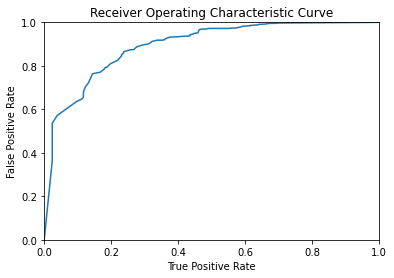

In [28]:
threshold = [i/100 for i in range(0,1001)]
probability = list(map(lambda x:x[1],prob))
true = y_test
tpr,fpr = roc_curve(true, probability, threshold)

### 22. Compute the AUC score.

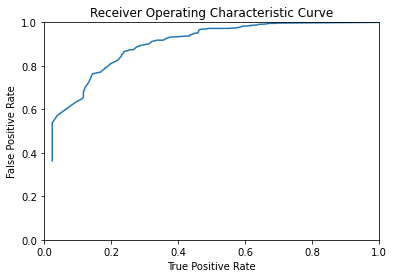

0.8888030224969947

In [29]:
area_under_curve(true, probability)

### 23. Generate the precision-recall curve and determine the optimal threshold. 

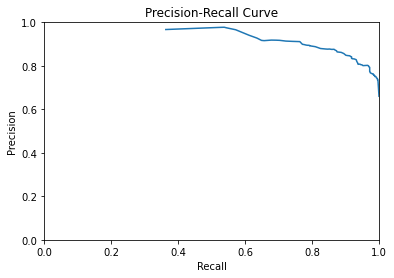

In [30]:
threshold = [x/100 for x in range(0,101)]
precision_recall_curve(y_test, probability, threshold)

### 24. Calculate and report the 95% confidence interval on the generalization error estimate.

In [31]:
from math import sqrt
z = 1.96
n = len(X_test)
acc, generalization_error = accuracy_calc(true, pred)
confidence_interval_radius = (z*sqrt((acc)*generalization_error))/sqrt(n)
confidence_interval = [generalization_error - confidence_interval_radius,generalization_error + confidence_interval_radius]
print(confidence_interval)

[0.14493921105432223, 0.19179548282322884]


In [32]:
n

980